In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from LDNN import *
from Data import *

%matplotlib inline

## Loading data

In [2]:
X_train, X_test, y_train, y_test = load_data("K1_mi10_GRC.csv", "MinMax", True)

X features: 
   Erm/Sci  Scm/Po  conf
0    39.76     0.2    90
1    39.76     0.2    80
2    39.76     0.2    70
3    39.76     0.2    60
4    39.76     0.2    50
Y features: 
   strain
0   0.126
1   0.260
2   0.380
3   0.500
4   0.640
shape of X_train:  (3, 342)
shape of y_train:  (1, 342)
shape of X_test:  (3, 86)
shape of y_test:  (1, 86)


## 2 Layer model

In [3]:
layers_dims = [3, 6, 1] #  2-layer model

In [4]:
parameters, costs = L_layer_model(X_train, y_train, layers_dims, num_iterations = 3000, print_cost = True)

Cost after iteration 0: 31.097225877978747
Cost after iteration 100: 28.160372042091012


Cost after iteration 200: 25.771595561665357
Cost after iteration 300: 21.627336056758953
Cost after iteration 400: 18.437339350523086
Cost after iteration 500: 15.937070554548711
Cost after iteration 600: 13.919547221071973
Cost after iteration 700: 12.298108493036034
Cost after iteration 800: 10.959100673228999
Cost after iteration 900: 9.861444030690018
Cost after iteration 1000: 8.948721094834337
Cost after iteration 1100: 8.18659948341874
Cost after iteration 1200: 7.552376444899429
Cost after iteration 1300: 6.997806373488362
Cost after iteration 1400: 6.452585908412178
Cost after iteration 1500: 5.957297503745105
Cost after iteration 1600: 5.4782697020486655
Cost after iteration 1700: 5.071705397397453
Cost after iteration 1800: 4.71639813496042
Cost after iteration 1900: 4.409510599479253
Cost after iteration 2000: 4.145117364677023
Cost after iteration 2100: 3.898527746184379
Cost after iteration 2200: 3.674163776870899
Cost after iteration 2300: 3.4670930245006755
Cost after 

### Predicting on train set

In [5]:
pred_train2 = predict(X_train, y_train, parameters)

Accuracy MSE: 2.4244522087673395


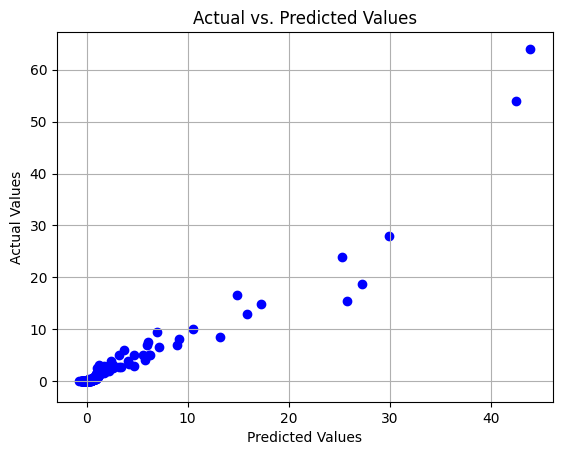

In [6]:
#plotpred(pred_train2,y_train)
plt.figure()
x= pred_train2
y= y_train
plt.scatter(x, y, color='blue', marker='o', label='Actual vs. Predicted')

# Plot the ideal line
plt.plot(x, x, color='red', label='Ideal Line')

# Adding labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [16]:
dfpred = pd.DataFrame({'Predictions': pred_train2.flatten(), 'Actual values': y_train.flatten()})
dfpred.head(70)

,Predictions,Actual values
0,0.226947,0.118
1,0.054009,0.108
2,0.679334,0.400
3,1.718668,2.880
4,0.986702,0.874
...,...,...
65,0.376252,0.136
66,17.292928,14.800
67,0.481868,0.300
68,0.178114,0.156


In [9]:
acc_train2 = accuracy(pred_train2, y_train)
print(acc_train2)

1700.0


### Predicting on test set

In [8]:
pred_test2 = predict(X_test, y_test, parameters)

Accuracy MSE: 0.2181060688823024


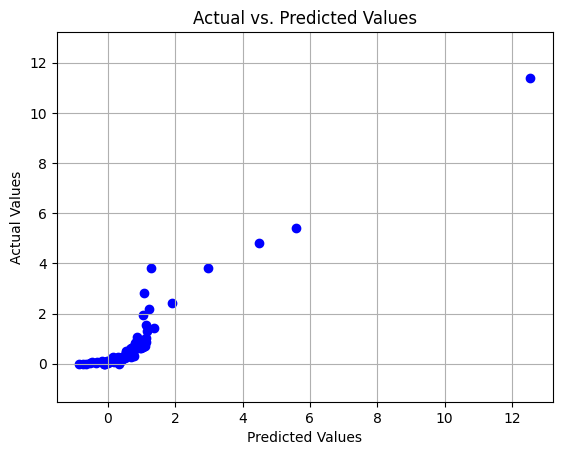

In [9]:
plotpred(pred_test2, y_test)

In [12]:
acc2test = accuracy(pred_test2, y_test)
print(acc2test)

600.0


## 4 Layer Model

In [ ]:
layers_dims4 = (3, 7, 7, 4, 1) #model of  4layers
parameters4, costs = L_layer_model(X_train, y_train, layers_dims4, num_iterations = 3000, print_cost = True)

In [ ]:
pred_train4 = predict(X_train, y_train, parameters4)
plt.scatter(pred_train4, y_train, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Ideal Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

In [ ]:
condition = np.logical_and(pred_train4 < 1.1 * y_train, pred_train4 > 0.90 * y_train)
t = np.count_nonzero(condition)
percentage = (t / len(x)) * 100
print(percentage)

In [ ]:
pred_test4 = predict(X_test, y_test, parameters)
plt.scatter(pred_test4, y_test, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot( pred_test4, pred_test4, linestyle='--', color='red', label='Ideal Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
condition = np.logical_and(pred_test4 < 1.05 * y_test, pred_test4 > 0.95 * y_test)
t = np.count_nonzero(condition)
percentage = (t / len(x)) * 100
print(percentage)

## Predicting on 7 Layer model

In [ ]:
layers_dims7 = (3, 16, 16, 16, 16, 16, 16, 1) #model of  4layers
parameters7, costs7 = L_layer_model(X_train, y_train, layers_dims4, num_iterations = 3000, print_cost = True)

In [ ]:
pred_train7 = predict(X_train, y_train, parameters7)
plt.scatter(pred_train7, y_train, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot(y_train, y_train, linestyle='--', color='red', label='Ideal Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
condition = np.logical_and(pred_train7 < 1.1 * y_train, pred_train7 > 0.90 * y_train)
t = np.count_nonzero(condition)
percentage = (t / len(x)) * 100
print(percentage)